In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
## load the data
df_cases = pd.read_pickle('./corona_scotland_regions_ts.pk')
df_total = pd.read_pickle('./corona_scotland_total_stats.pk')
df_pop = pd.read_pickle('./scotland_population.pk')

In [4]:
# reset indices
df_cases = df_cases.reset_index(drop=True)
df_total = df_total.reset_index(drop=True)

In [5]:
df_cases.tail(15)

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
70,964,304,255,6,824,867,1152,3663,331,1781,2497,7,54,1555,14260.0
71,966,310,257,6,824,871,1181,3707,331,1812,2539,7,54,1582,14447.0
72,974,313,257,6,824,873,1189,3731,331,1828,2561,7,54,1589,14537.0
73,976,316,257,6,824,880,1200,3742,331,1840,2568,7,54,1593,14594.0
74,981,317,257,6,825,883,1206,3759,333,1853,2575,7,54,1599,14655.0
75,987,322,257,6,826,894,1216,3780,334,1867,2584,7,54,1617,14751.0
76,995,322,257,6,826,896,1218,3806,334,1892,2611,7,54,1632,14856.0
77,1001,322,257,6,826,909,1223,3841,335,1913,2634,7,54,1641,14969.0
78,1015,322,257,6,826,915,1223,3865,335,1922,2649,7,54,1645,15041.0
79,1019,322,258,6,826,917,1224,3876,335,1934,2665,7,54,1658,15101.0


In [6]:
current_day = df_cases.index[-1]
print("### Time Since Last Doubling ###")
for col in df_cases.columns:
    time_at_half = df_cases[df_cases[col] < (df_cases[col].iloc[-1]/2)].index[-1]
    time_since_doubling = current_day - time_at_half
    
    print(f'{col} : {time_since_doubling} days')

### Time Since Last Doubling ###
Ayrshire and Arran : 43 days
Borders : 51 days
Dumfries and Galloway : 55 days
Eileanan Siar (Western Isles) : 59 days
Fife : 45 days
Forth Valley : 41 days
Grampian : 36 days
Greater Glasgow and Clyde : 40 days
Highland : 45 days
Lanarkshire : 42 days
Lothian : 40 days
Orkney : 56 days
Shetland : 63 days
Tayside : 45 days
Scotland (Total) : 42 days


In [7]:
df_total.tail(10)

,Total Tests,Total Positive Cases,Total Deaths
75,92594,14751,2184
76,95173,14856,2221
77,97607,14969,2245
78,99932,15041,2261
79,101713,15101,2270
80,103508,15156,2273
81,104880,15185,2291
82,106984,15240,2304
83,109031,15288,2316
84,111085,15327,2331


## National Statistics

### total number of cases over time

In [8]:
roll = 7

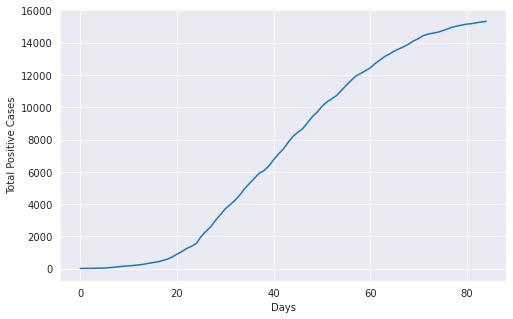

In [9]:
df_total['Total Positive Cases'].plot(figsize=(8, 5))
plt.ylabel('Total Positive Cases')
plt.xlabel('Days')
plt.show()

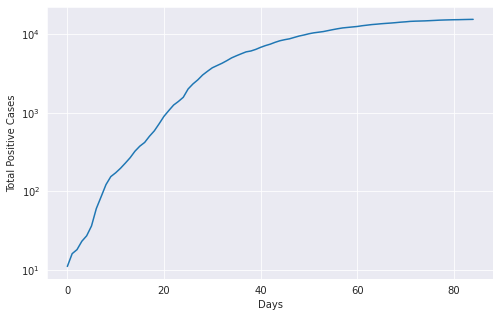

In [10]:
## same but with log y axis
df_total['Total Positive Cases'].plot(logy=True, figsize=(8, 5))
plt.ylabel('Total Positive Cases')
plt.xlabel('Days')
plt.show()

### Total Number of Tests Over Time

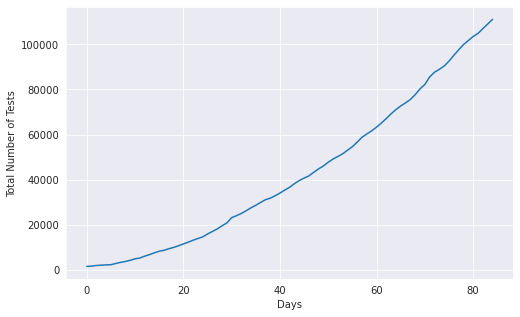

In [11]:
df_total['Total Tests'].plot(figsize=(8, 5))
plt.ylabel('Total Number of Tests')
plt.xlabel('Days')
plt.show()

In [12]:
num_test_per_day = df_total['Total Tests'].diff()
num_test_per_day.loc[0] = df_total['Total Tests'].loc[0]

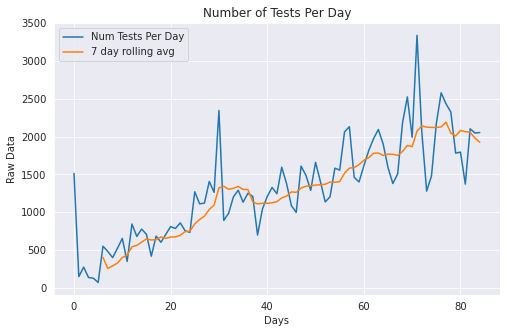

In [13]:
num_test_per_day.plot(figsize=(8, 5), label='Num Tests Per Day')
num_test_per_day.rolling(roll).mean().dropna().plot(label='7 day rolling avg')
plt.title('Number of Tests Per Day')
plt.ylabel('Raw Data')
plt.xlabel('Days')
plt.legend()
plt.show()

### Total number of deaths over time

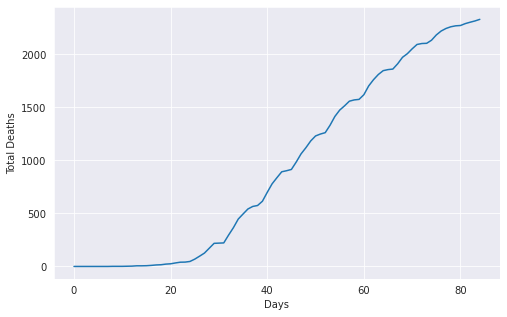

In [14]:
df_total['Total Deaths'].plot(figsize=(8, 5))
plt.ylabel('Total Deaths')
plt.xlabel('Days')
plt.show()

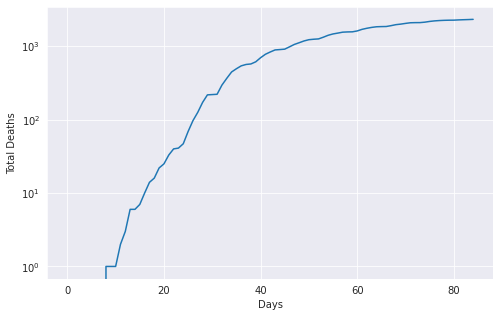

In [15]:
df_total['Total Deaths'].plot(logy=True, figsize=(8, 5))
plt.ylabel('Total Deaths')
plt.xlabel('Days')
plt.show()

### What is the Delay Between Recorded Cases and Deaths?

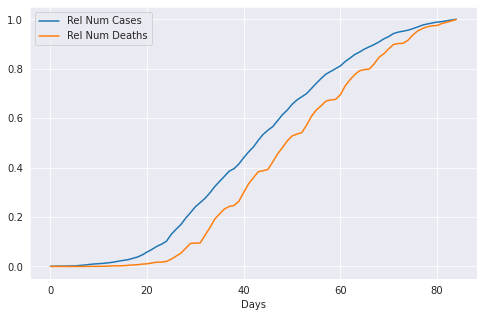

In [16]:
rel_cases = (df_total['Total Positive Cases'] / df_total['Total Positive Cases'].max())
rel_deaths = (df_total['Total Deaths'] / df_total['Total Deaths'].max())

rel_cases.plot(label='Rel Num Cases', figsize=(8, 5))
rel_deaths.plot(label='Rel Num Deaths')

plt.xlabel('Days')
plt.legend()
plt.show()

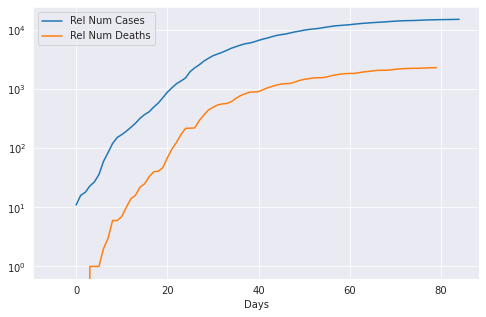

In [17]:
rel_cases = df_total['Total Positive Cases'].copy()
rel_deaths = df_total['Total Deaths'].copy()

# subtract some time off of deaths
rel_deaths.index = rel_deaths.index - 5

rel_cases.plot(logy=True, label='Rel Num Cases', figsize=(8, 5))
rel_deaths.plot(logy=True, label='Rel Num Deaths')

plt.xlabel('Days')
plt.legend()
plt.show()

- Deaths are perhaps roughly 5-10 days behind cases using this hand-wavy plot argument.

### What is the day-on-day change in number of cases?

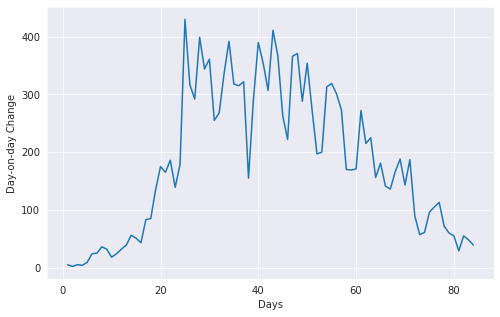

In [18]:
df_total['Total Positive Cases'].diff().dropna().plot(figsize=(8, 5))
plt.ylabel('Day-on-day Change')
plt.xlabel('Days')
plt.show()

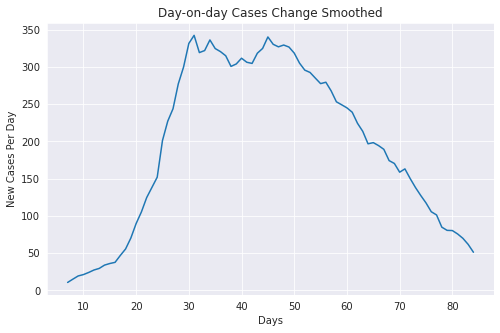

In [19]:
df_total['Total Positive Cases'].diff().dropna().rolling(roll).mean().plot(figsize=(8, 5))
plt.ylabel('New Cases Per Day')
plt.xlabel('Days')
plt.title('Day-on-day Cases Change Smoothed')
plt.show()

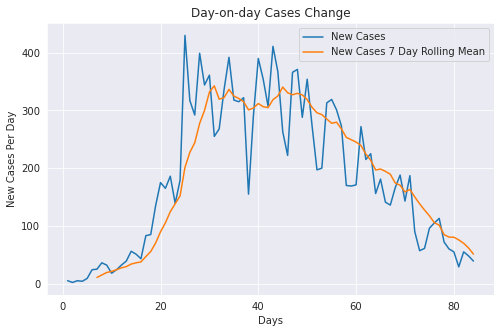

In [20]:
df_total['Total Positive Cases'].diff().dropna().plot(figsize=(8, 5), label='New Cases')
df_total['Total Positive Cases'].diff().dropna().rolling(roll).mean().plot(label='New Cases 7 Day Rolling Mean')
plt.ylabel('New Cases Per Day')
plt.xlabel('Days')
plt.title('Day-on-day Cases Change')
plt.legend()
plt.show()

### What is the day-on-day percentage rise in cases?

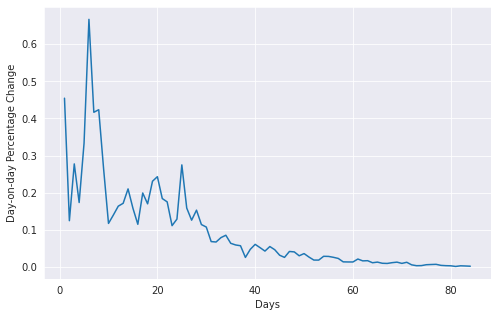

In [21]:
df_total['Total Positive Cases'].pct_change().plot(figsize=(8, 5))
plt.ylabel('Day-on-day Percentage Change')
plt.xlabel('Days')
plt.show()

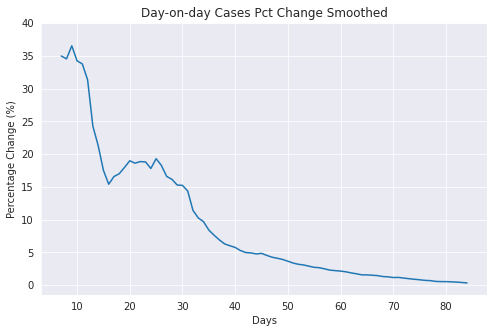

In [22]:
df_total['Total Positive Cases'].pct_change().rolling(roll).mean().mul(100).plot(figsize=(8, 5))
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.yticks(np.arange(0, 45, 5))
plt.title('Day-on-day Cases Pct Change Smoothed')
plt.show()

In [23]:
df_total['Total Positive Cases'].pct_change()[-7:]

78    0.004810
79    0.003989
80    0.003642
81    0.001913
82    0.003622
83    0.003150
84    0.002551
Name: Total Positive Cases, dtype: float64

In [24]:
df_total['Total Positive Cases'].pct_change().describe()

count    84.000000
mean      0.095802
std       0.121057
min       0.001913
25%       0.013857
50%       0.045079
75%       0.143599
max       0.666667
Name: Total Positive Cases, dtype: float64

In [25]:
df_cases.pct_change()[-10:]

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
75,0.006116,0.015773,0.000000,0.0,0.001212,0.012458,0.008292,0.005587,0.003003,0.007555,0.003495,0.000000,0.0,0.011257,0.006551
76,0.008105,0.000000,0.000000,0.0,0.000000,0.002237,0.001645,0.006878,0.000000,0.013390,0.010449,0.000000,0.0,0.009276,0.007118
77,0.006030,0.000000,0.000000,0.0,0.000000,0.014509,0.004105,0.009196,0.002994,0.011099,0.008809,0.000000,0.0,0.005515,0.007606
78,0.013986,0.000000,0.000000,0.0,0.000000,0.006601,0.000000,0.006248,0.000000,0.004705,0.005695,0.000000,0.0,0.002438,0.004810
79,0.003941,0.000000,0.003891,0.0,0.000000,0.002186,0.000818,0.002846,0.000000,0.006243,0.006040,0.000000,0.0,0.007903,0.003989
80,0.000000,0.000000,0.007752,0.0,0.001211,0.000000,0.017157,0.004128,0.000000,0.005171,0.001501,0.000000,0.0,0.000603,0.003642
81,0.003925,0.003106,0.000000,0.0,0.001209,0.001091,0.004016,0.001542,0.002985,0.002058,0.002248,0.000000,0.0,0.000000,0.001913
82,0.005865,0.000000,0.000000,0.0,0.002415,0.001089,0.004800,0.004618,0.002976,0.004620,0.003738,0.000000,0.0,0.001206,0.003622
83,0.005831,0.000000,0.000000,0.0,0.000000,0.000000,0.002389,0.004597,0.000000,0.005621,0.002235,0.000000,0.0,0.002408,0.003150
84,0.003865,0.006192,0.000000,0.0,0.001205,0.000000,0.007943,0.001271,0.000000,0.003049,0.002601,0.142857,0.0,0.001802,0.002551


In [26]:
df_cases.pct_change().rolling(roll).mean()[-10:]

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
75,0.006085,0.011634,1.682878e-03,0.0,0.001746,0.005727,0.011452,0.007843,0.004362,0.011718,0.008951,0.000000,0.0,0.009367,0.008232
76,0.006337,0.011153,1.120448e-03,0.0,0.000520,0.005381,0.009270,0.006870,0.002599,0.010228,0.008620,0.000000,0.0,0.008335,0.007320
77,0.005398,0.008277,1.120448e-03,0.0,0.000347,0.006792,0.008606,0.006805,0.001720,0.010273,0.007671,0.000000,0.0,0.007731,0.006960
78,0.007099,0.005457,9.516197e-17,0.0,0.000347,0.007075,0.005010,0.005982,0.001720,0.008459,0.006082,0.000000,0.0,0.005599,0.005774
79,0.006479,0.004075,5.558644e-04,0.0,0.000347,0.007060,0.004159,0.005464,0.001720,0.008089,0.005707,0.000000,0.0,0.006096,0.005454
80,0.006186,0.002705,1.663284e-03,0.0,0.000519,0.005914,0.005288,0.005632,0.001720,0.007890,0.005531,0.000000,0.0,0.005823,0.005414
81,0.006015,0.002697,1.663284e-03,0.0,0.000519,0.005583,0.005147,0.005204,0.001283,0.007175,0.005462,0.000000,0.0,0.005285,0.005090
82,0.005979,0.000444,1.663284e-03,0.0,0.000691,0.003959,0.004649,0.005065,0.001279,0.006755,0.005497,0.000000,0.0,0.003849,0.004672
83,0.005654,0.000444,1.663284e-03,0.0,0.000691,0.003639,0.004755,0.004739,0.001279,0.005645,0.004324,0.000000,0.0,0.002867,0.004105
84,0.005345,0.001328,1.663284e-03,0.0,0.000863,0.001567,0.005303,0.003607,0.000852,0.004495,0.003437,0.020408,0.0,0.002337,0.003382


### What is the day-on-day percentage rise in deaths?

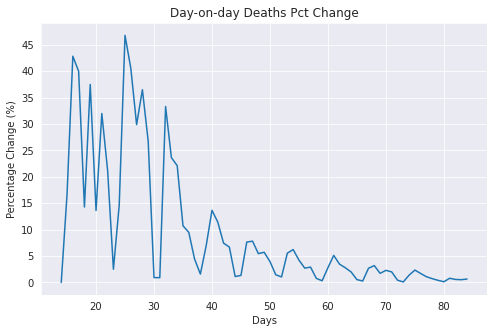

In [27]:
# remove first 13 points because they have nothing
death_pct_change = df_total['Total Deaths'].iloc[13:].pct_change()
death_pct_change.mul(100).plot(figsize=(8, 5))
plt.yticks(np.arange(0, 50, 5))
plt.title('Day-on-day Deaths Pct Change')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.show()

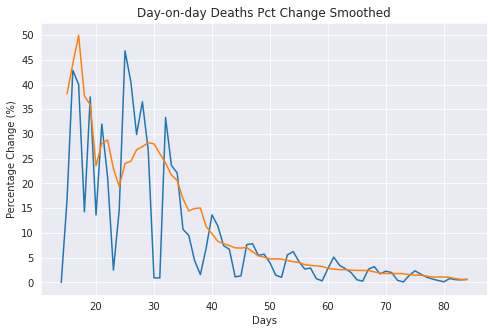

In [28]:
# remove first 13 points because they have nothing
death_pct_change = df_total['Total Deaths'].pct_change()
death_pct_change.iloc[14:].mul(100).plot(figsize=(8,5))
death_pct_change.rolling(roll).mean().mul(100).plot(figsize=(8, 5))
plt.yticks(np.arange(0, 55, 5))
plt.title('Day-on-day Deaths Pct Change Smoothed')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.show()

In [29]:
death_pct_change[-10:]

75    0.023430
76    0.016941
77    0.010806
78    0.007127
79    0.003981
80    0.001322
81    0.007919
82    0.005674
83    0.005208
84    0.006477
Name: Total Deaths, dtype: float64

In [30]:
death_pct_change.describe()

count    77.000000
mean           inf
std            NaN
min       0.000000
25%       0.010806
50%       0.034645
75%       0.142857
max            inf
Name: Total Deaths, dtype: float64

### What is the Proportion of Positive Tests?

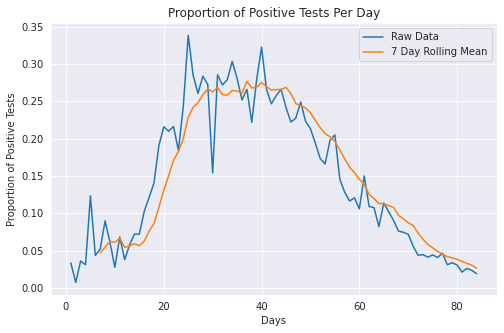

In [31]:
prop_pos = (df_total['Total Positive Cases'].diff() / df_total['Total Tests'].diff())

prop_pos.plot(figsize=(8, 5), label='Raw Data')
prop_pos.rolling(roll).mean().dropna().plot(label='7 Day Rolling Mean')
plt.title('Proportion of Positive Tests Per Day')
plt.ylabel('Proportion of Positive Tests')
plt.xlabel('Days')
plt.legend()
plt.show()

### What is the Day-on-day rise in deaths?

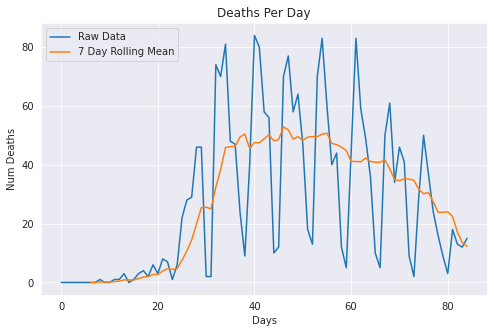

In [32]:
# remove first 13 points because they have nothing
death_per_day = df_total['Total Deaths'].diff().fillna(0)
death_per_day.plot(figsize=(8, 5), label='Raw Data')
death_per_day.rolling(roll).mean().plot(label='7 Day Rolling Mean')
plt.title('Deaths Per Day')
plt.ylabel('Num Deaths')
plt.xlabel('Days')
plt.legend()
plt.show()

## Regional Statistics

### Num Cases Per Region

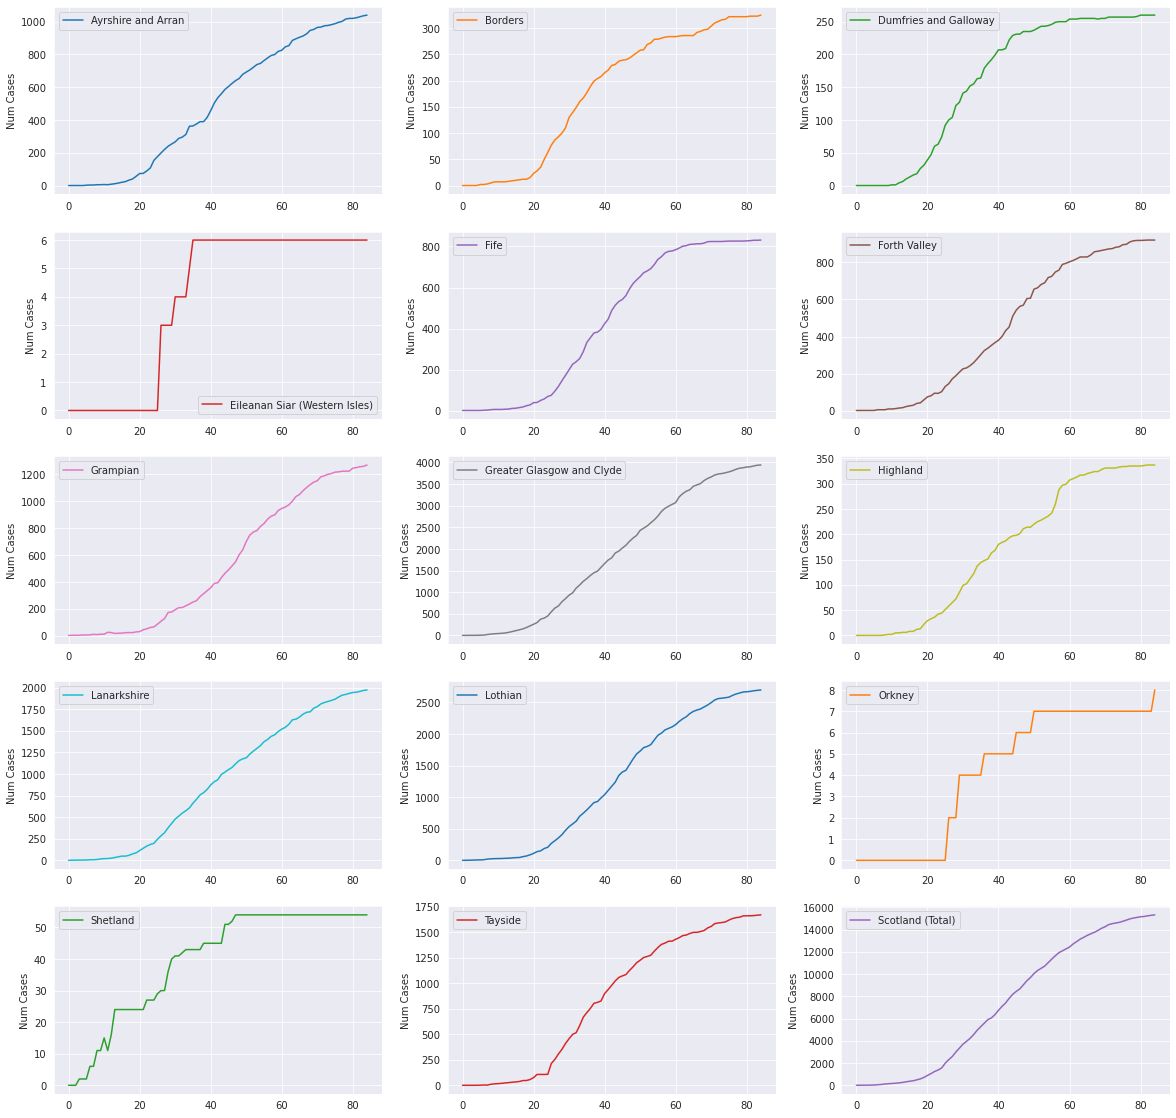

In [33]:
axes = df_cases.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases')
plt.show()

- Same again, but sharing the y axis for comparison, omitting the total so we can compare regions

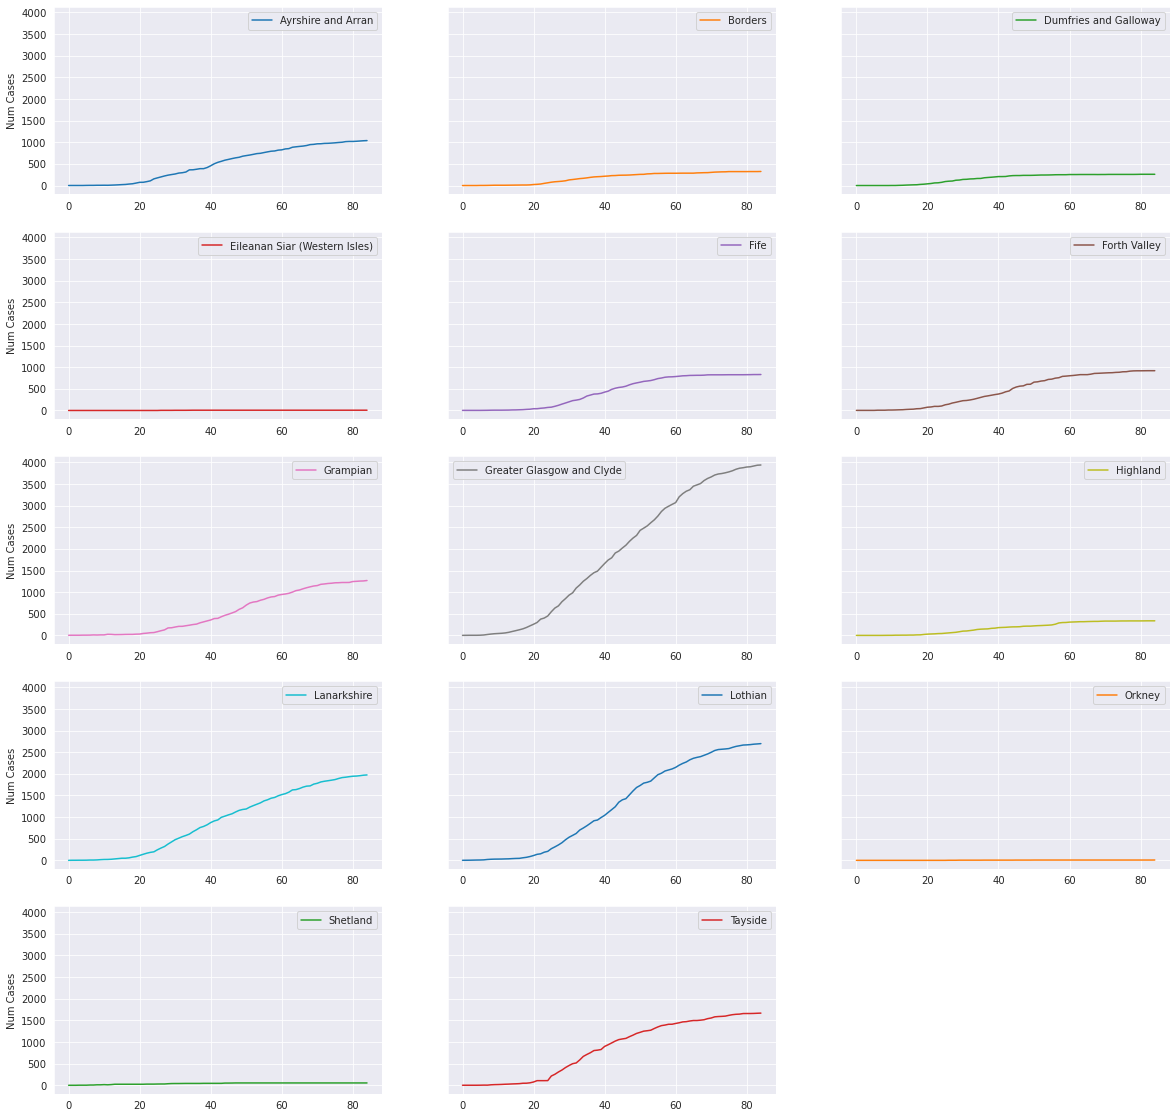

In [34]:
axes = df_cases.drop(columns='Scotland (Total)').plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases')
plt.show()

### Num Cases Per Capita Per Region

In [35]:
194 / 178

1.0898876404494382

In [36]:
## make sure columns are in the right order
assert all(df_cases.columns == df_pop.index)

In [37]:
df_cases_rel = df_cases / df_pop.values.T * 100000

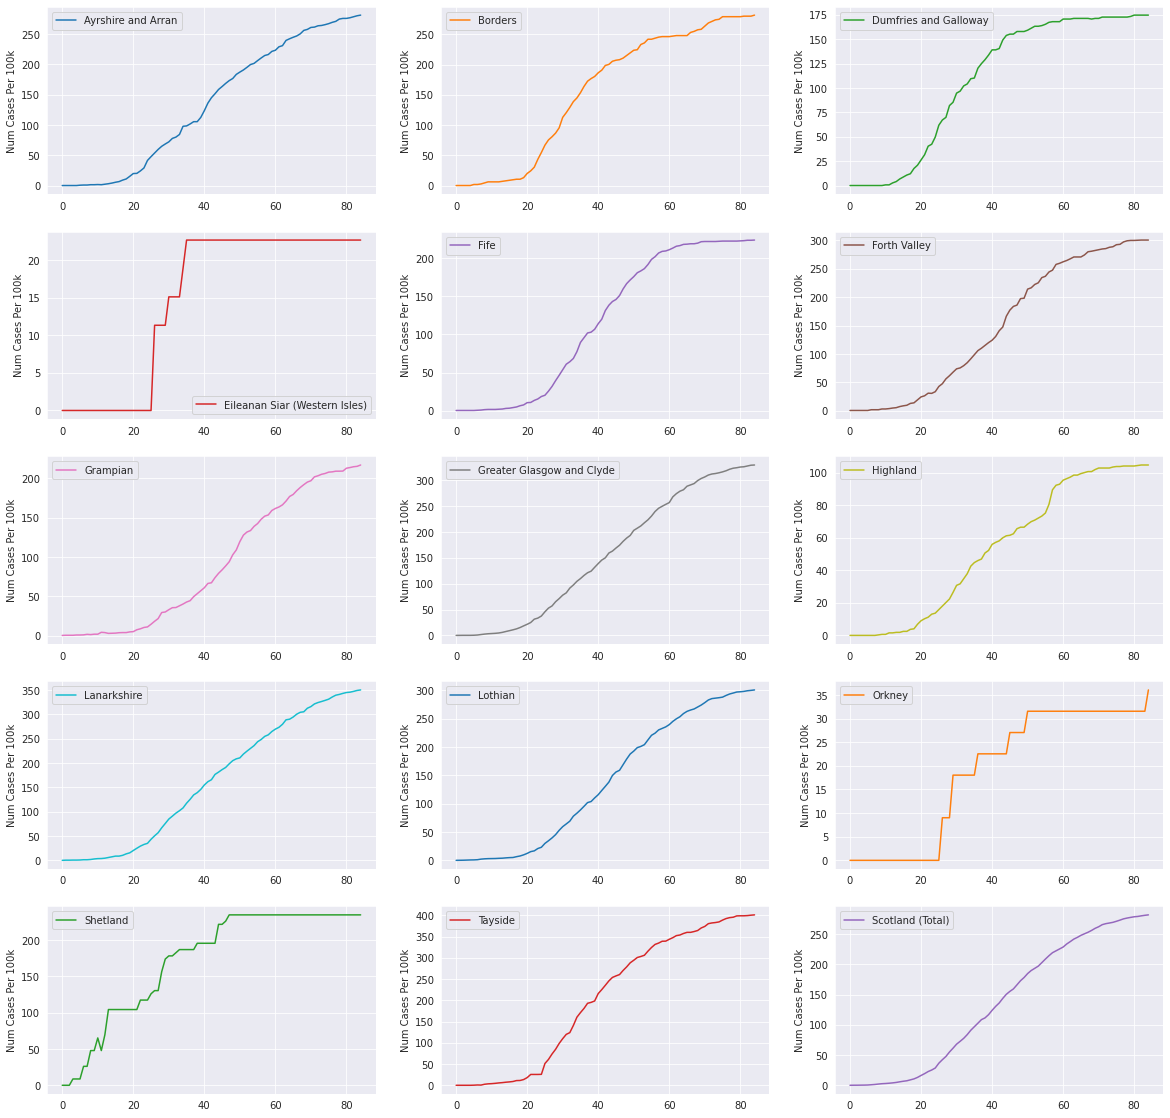

In [38]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per 100k')
plt.show()

- Same again but sharing the y axis for comparison

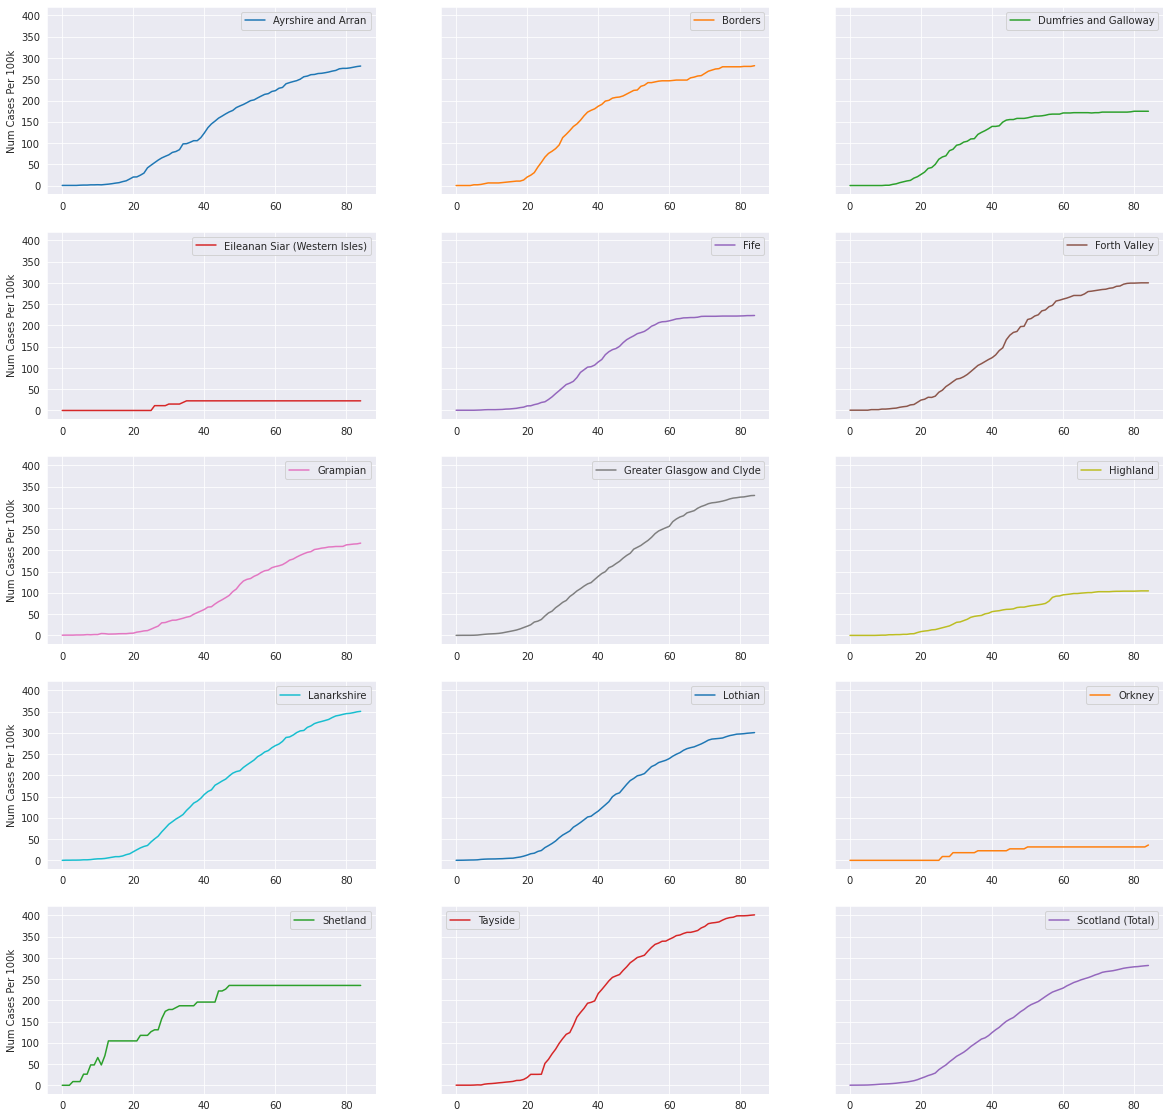

In [39]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per 100k')
plt.show()

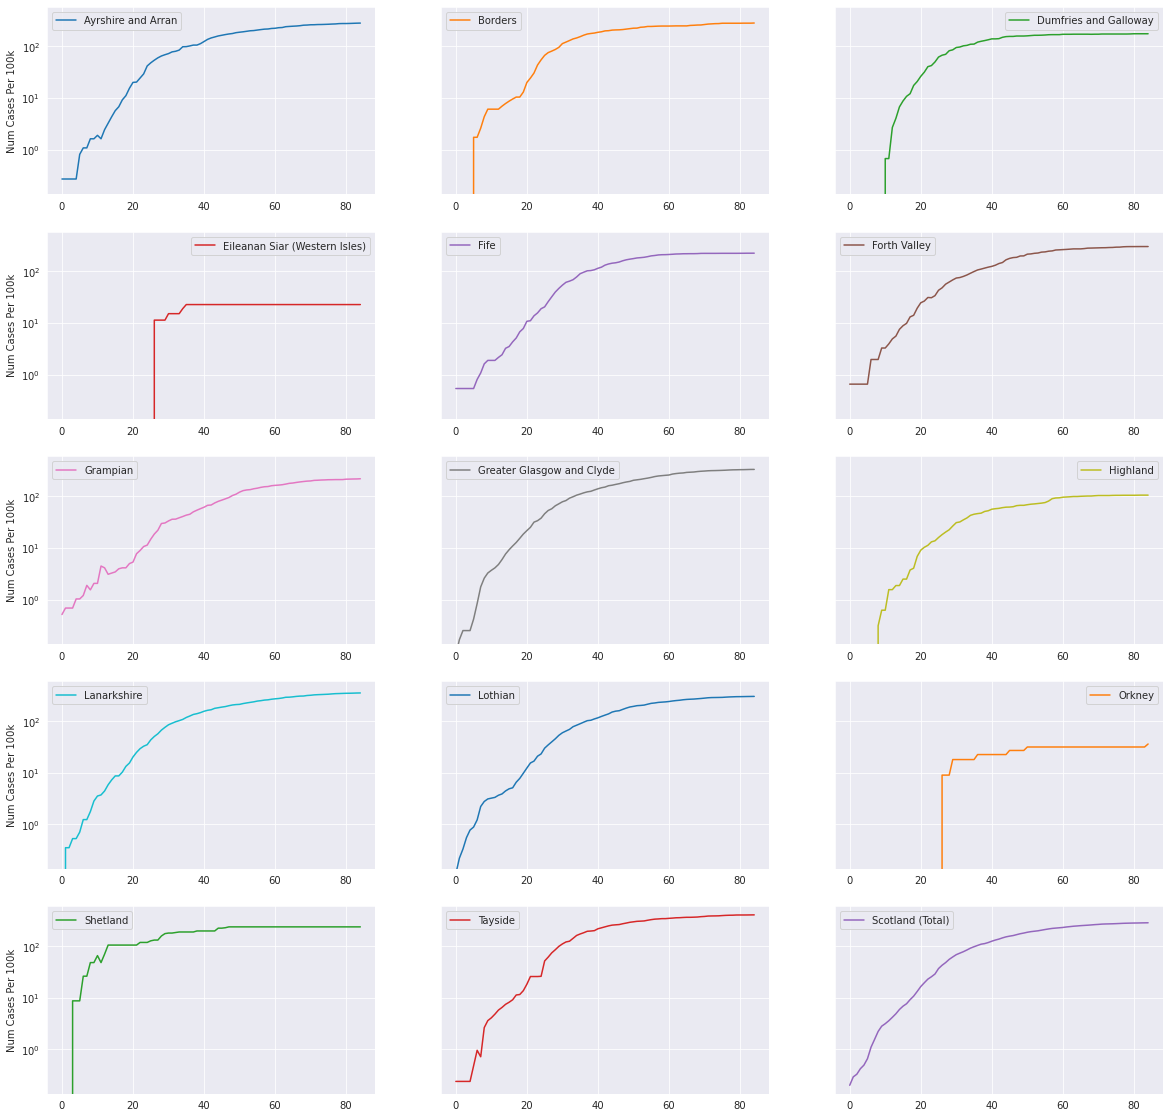

In [40]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False, logy=True)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per 100k')
plt.show()

### Day-on-day Num Cases

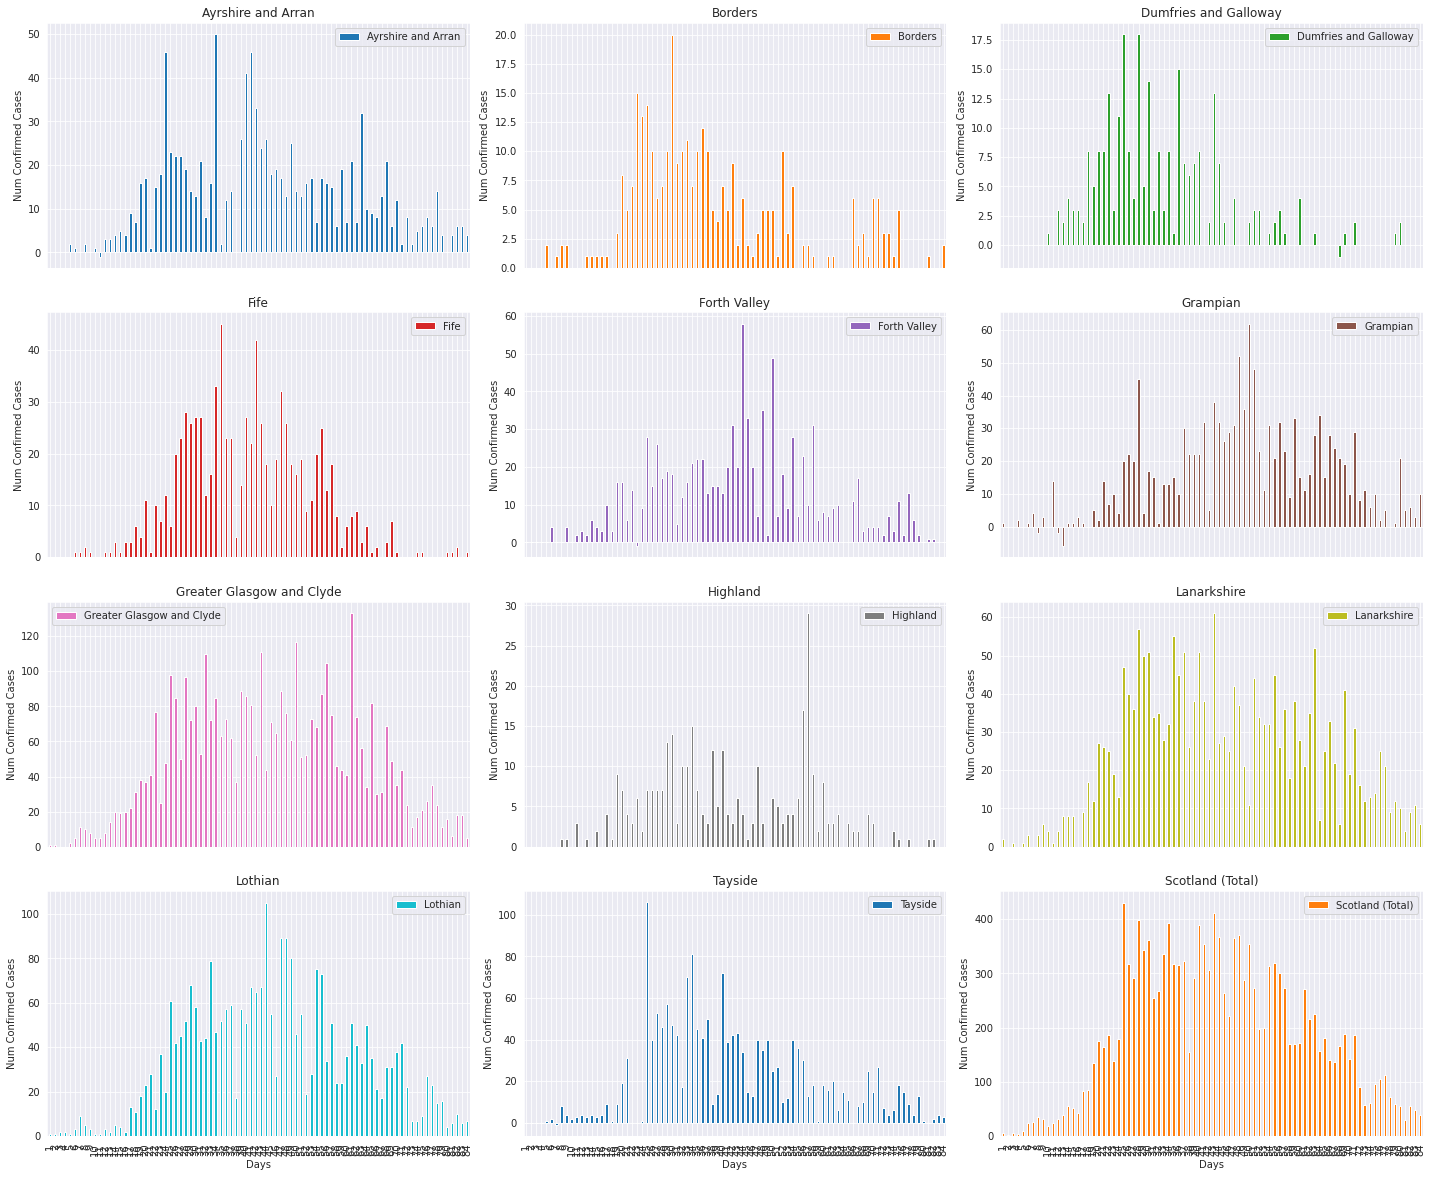

In [41]:
diff_cases = df_cases.drop(columns=['Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna()#.rolling(3).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
plt.tight_layout()
plt.show()

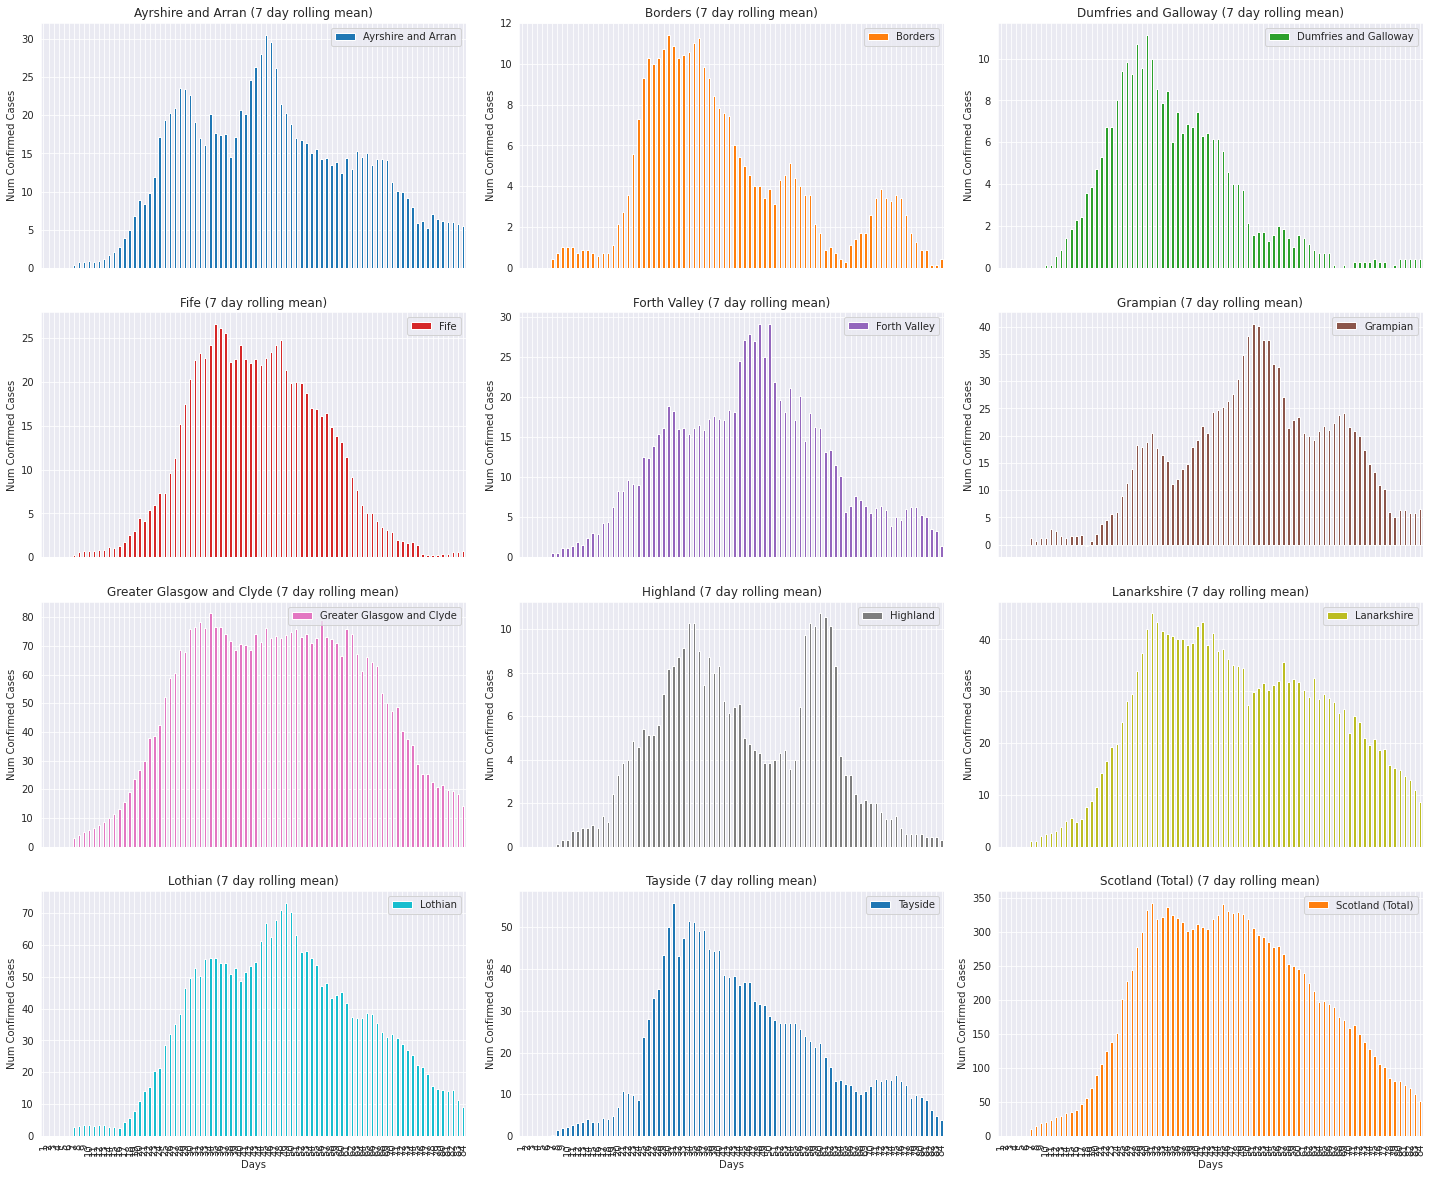

In [42]:
diff_cases = df_cases.drop(columns=['Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna().rolling(roll).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
    ax.set_title(ax.get_title() + f' ({roll} day rolling mean)')
plt.tight_layout()
plt.show()

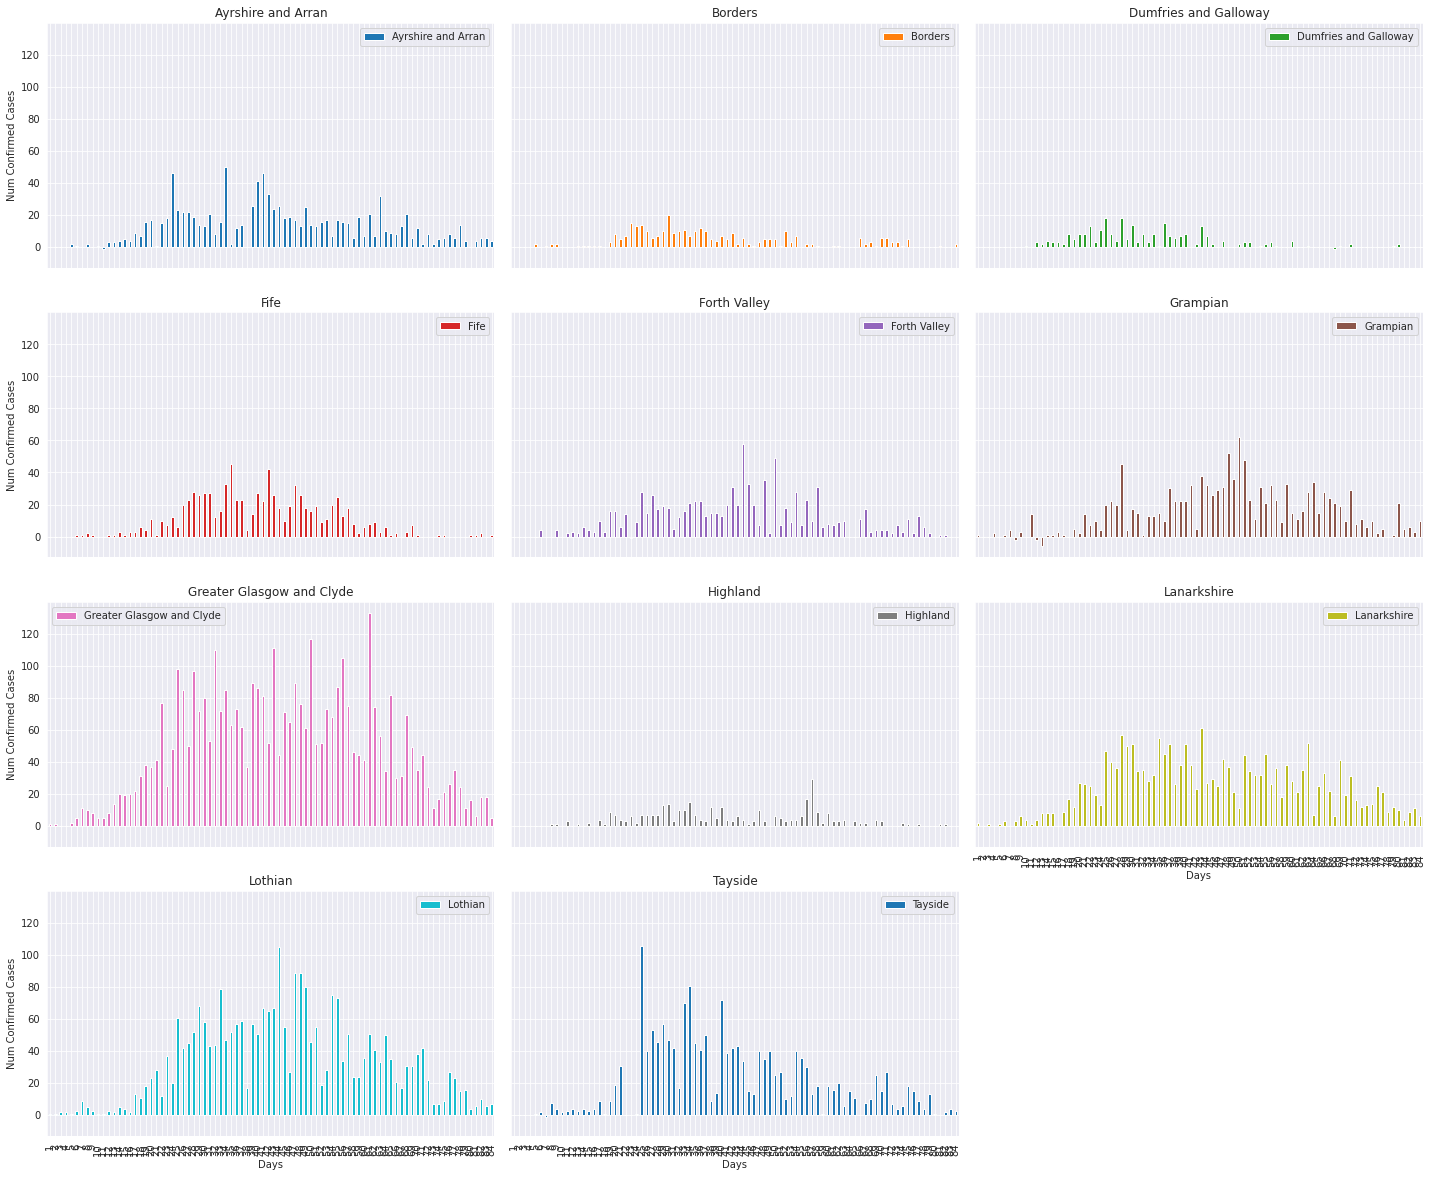

In [43]:
diff_cases = df_cases.drop(columns=['Scotland (Total)', 'Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna()#.rolling(3).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), sharey=True, layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
plt.tight_layout()
plt.show()

In [44]:
df_cases.columns

Index(['Ayrshire and Arran', 'Borders', 'Dumfries and Galloway',
       'Eileanan Siar (Western Isles)', 'Fife', 'Forth Valley', 'Grampian',
       'Greater Glasgow and Clyde', 'Highland', 'Lanarkshire', 'Lothian',
       'Orkney', 'Shetland', 'Tayside', 'Scotland (Total)'],
      dtype='object', name='Health Board')

### Log Growth Curves for Each Region

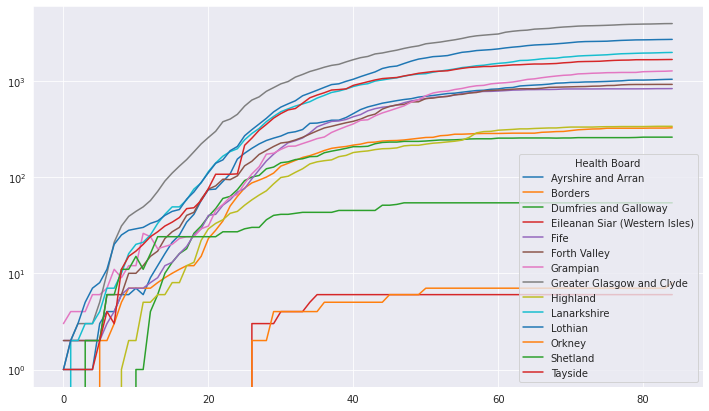

In [45]:
df_cases.drop(columns='Scotland (Total)').plot(logy=True, figsize=(12, 7))
plt.show()

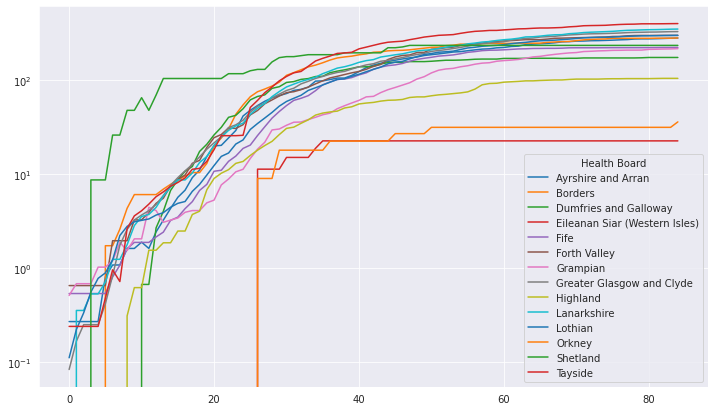

In [46]:
df_cases_rel.drop(columns='Scotland (Total)').plot(logy=True, figsize=(12, 7))
plt.show()